<a href="https://colab.research.google.com/github/Chitswaz/flower-classifier/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#initialize
import tensorflow as tf
import sklearn
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [28]:
#load dataset
iris= load_iris()

In [29]:
X= pd.DataFrame(iris.data, columns= iris.feature_names)
X['species']= iris.target
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
"""
# @title petal width (cm) vs species

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for each species
ax.scatter(X['petal length (cm)'], X['petal width (cm)'], X['species'], c=X['species'], cmap='viridis', s=32, alpha=0.8)

# Set labels for axes
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')
ax.set_zlabel('Species')

# Set title
plt.title('3D Scatter Plot: Petal Length vs. Petal Width vs. Species')

# Show the colorbar
plt.colorbar(label='Species')

# Display the plot
plt.show()
"""

"\n# @title petal width (cm) vs species\n\nfrom mpl_toolkits.mplot3d import Axes3D\nimport matplotlib.pyplot as plt\n\n# Create a 3D scatter plot\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\n\n# Scatter plot with different colors for each species\nax.scatter(X['petal length (cm)'], X['petal width (cm)'], X['species'], c=X['species'], cmap='viridis', s=32, alpha=0.8)\n\n# Set labels for axes\nax.set_xlabel('Petal Length (cm)')\nax.set_ylabel('Petal Width (cm)')\nax.set_zlabel('Species')\n\n# Set title\nplt.title('3D Scatter Plot: Petal Length vs. Petal Width vs. Species')\n\n# Show the colorbar\nplt.colorbar(label='Species')\n\n# Display the plot\nplt.show()\n"

In [31]:
features= ['petal width (cm)', 'petal length (cm)']
x= X[features]
Y= X.species

#one hot encoding
y= pd.get_dummies(Y).values

train_x, test_x, train_y, test_y= train_test_split(x,y, test_size= 0.2, random_state= 42)


In [32]:
# check data dimensions
train_x= tf.constant(train_x, dtype= 'float32')
test_x= tf.constant(test_x, dtype= 'float32')
train_y= tf.constant(train_y, dtype= 'float32')
test_y= tf.constant(test_y, dtype= 'float32')


In [33]:
numFeatures= train_x.shape[1]
numClasses= test_y.shape[1]
print("num features: ", numFeatures, " numClasses: ", numClasses)

num features:  2  numClasses:  3


In [34]:
weights= tf.Variable(tf.random.normal(shape=(numFeatures, numClasses)))
bias= tf.Variable(tf.random.normal(shape=(1, numClasses)))

In [35]:
# logistic regression
def logistic_regression(input_variable):
  product= tf.matmul(input_variable, weights)
  addition= tf.add(product, bias)
  return tf.nn.sigmoid(addition)


In [36]:
num_epochs= 800
# Defining our learning rate iterations (decay)
learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.007,
                                          decay_steps=train_x.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

In [37]:
# loss functions
loss_object= tf.keras.losses.MeanSquaredLogarithmicError()
optimizer= tf.keras.optimizers.SGD(learning_rate)


In [38]:
# Accuracy metric.
def accuracy(y_pred, y_true):
# Predicted class is the index of the highest score in prediction vector (i.e. argmax).

    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))

    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [39]:
# optimization process
def optimization(x_, y_):
  with tf.GradientTape() as g:
    pred= logistic_regression(x_)
    loss= loss_object(pred, y_)
  gradients= g.gradient(loss,[weights, bias])
  optimizer.apply_gradients(zip(gradients, [weights, bias]))


In [40]:
# begin the process
epoch_values= []
losses= []
accuracy_values= []
display_step= 10
loss= 0
diff= 1


for i in range(num_epochs):
  # run optimization
  optimization(train_x, train_y)

  if i % display_step  == 0:
    epoch_values.append(i)

    prediction= logistic_regression(test_x)

    new_loss= loss_object(prediction, test_y)

    losses.append(new_loss)

    # Generate accuracy stats on test data
    acc = accuracy(prediction, test_y)
    accuracy_values.append(acc)

    diff= abs(new_loss - loss)
    loss= new_loss

# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %acc.numpy())


final accuracy on test set: 0.56666666


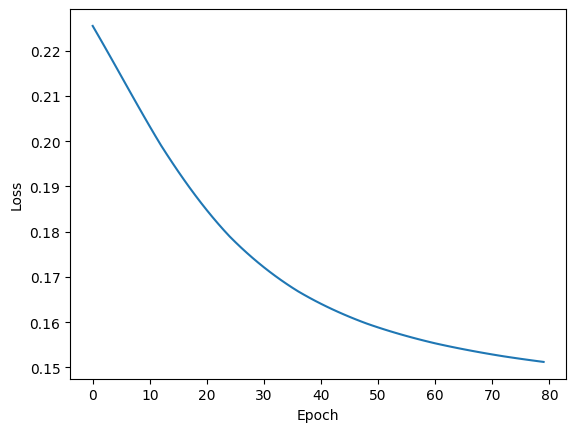

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(losses)
plt.show()

losses.clear()